### Table of Contents

1. Preparing Data
2. Classification Model
3. Training
4. Evaluation
5. Improving the model
6. Adding non-linearity
7. Multi-class Classification

## Data Preparation

In [72]:
from sklearn.datasets import make_moons

n_samples = 1000
X, y = make_moons(n_samples= n_samples, noise= 0.07, random_state= 42)

In [73]:
import pandas as pd
circles = pd.DataFrame({
    "X1":  X[:, 0],
    "X2":  X[:, 1],
    "label": y
})

In [74]:
circles.label.value_counts()

1    500
0    500
Name: label, dtype: int64

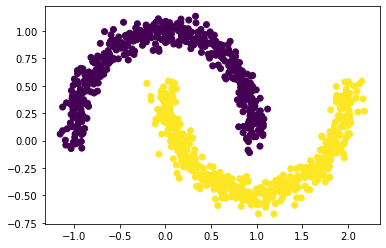

In [75]:
import matplotlib.pyplot as plt
plt.scatter(x = circles["X1"], y = circles["X2"], c= circles["label"]);

In [76]:
# Turning data into tensors
import torch

X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

In [77]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,  random_state=42) 
len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

## Model Building

In [78]:
from torch import nn

device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [8]:
class Model1(nn.Module):

    def __init__(self) -> None:
        super().__init__()
        self.layer1 = nn.Linear(in_features= 2, out_features= 10)
        self.layer2 = nn.Linear(in_features= 10, out_features=1)

    def forward(self, x):
        return self.layer2(self.layer1(x))

In [79]:
model_1 = Model1().to(device)
model_1

Model1(
  (layer1): Linear(in_features=2, out_features=10, bias=True)
  (layer2): Linear(in_features=10, out_features=1, bias=True)
)

In [80]:
loss_function = nn.BCEWithLogitsLoss() # built-in sigmoid function
optimizer = torch.optim.SGD(model_1.parameters(), lr = 0.01)

In [81]:
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    return (correct / len(y_pred)) * 100

In [82]:
y_test

tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1., 1., 0.,
        1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 1.,
        1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0.,
        1., 0., 1., 1., 1., 0., 1., 0., 0., 1., 1., 1., 1., 0., 0., 0., 1., 0.,
        0., 1., 1., 1., 1., 0., 0., 1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0.,
        1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 0., 0., 1., 1., 0., 0., 1., 0.,
        0., 1., 1., 1., 0., 1., 1., 0., 1., 0., 1., 0., 1., 0., 0., 1., 1., 0.,
        1., 1., 0., 1., 1., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1.,
        0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 1., 0., 0., 1., 0., 1.,
        1., 0., 1., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0.,
        0., 1., 0., 1., 1., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 0., 1., 0.,
        1., 1.])

## Model Training

In [83]:
torch.manual_seed(42)

X_train, X_test = X_train.to(device), X_test.to(device)
y_train, y_test = y_train.to(device), y_test.to(device)

for i in range(100):

    model_1.train()

    y_logits = model_1(X_train).squeeze()
    y_pred_train = torch.round(torch.sigmoid(y_logits))
    loss = loss_function(y_logits, y_train)
    accuracy = accuracy_fn(y_train, y_pred_train)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    model_1.eval()
    with torch.inference_mode():
        test_logits = model_1(X_test).squeeze() 
        test_pred = torch.round(torch.sigmoid(test_logits))
        test_loss = loss_function(test_logits, y_test)
        test_acc = accuracy_fn(y_test, test_pred)


    if i % 10 == 0:
        print(f"Epoch: {i} | Loss: {loss:.5f}, Accuracy: {accuracy:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")



Epoch: 0 | Loss: 0.68479, Accuracy: 60.38% | Test loss: 0.67775, Test acc: 65.00%
Epoch: 10 | Loss: 0.66305, Accuracy: 72.88% | Test loss: 0.65815, Test acc: 78.50%
Epoch: 20 | Loss: 0.64329, Accuracy: 80.25% | Test loss: 0.64035, Test acc: 86.50%
Epoch: 30 | Loss: 0.62519, Accuracy: 84.12% | Test loss: 0.62404, Test acc: 86.00%
Epoch: 40 | Loss: 0.60849, Accuracy: 88.50% | Test loss: 0.60898, Test acc: 88.00%
Epoch: 50 | Loss: 0.59296, Accuracy: 87.62% | Test loss: 0.59497, Test acc: 89.00%
Epoch: 60 | Loss: 0.57846, Accuracy: 87.00% | Test loss: 0.58187, Test acc: 88.00%
Epoch: 70 | Loss: 0.56485, Accuracy: 86.25% | Test loss: 0.56955, Test acc: 87.50%
Epoch: 80 | Loss: 0.55203, Accuracy: 85.50% | Test loss: 0.55793, Test acc: 87.00%
Epoch: 90 | Loss: 0.53992, Accuracy: 85.25% | Test loss: 0.54693, Test acc: 86.00%


## Evaluation

In [84]:
import numpy as np

def plot_decision_boundary(model: torch.nn.Module, X: torch.Tensor, y: torch.Tensor):
    """Plots decision boundaries of model predicting on X in comparison to y.

    Source - https://github.com/mrdbourke/pytorch-deep-learning/blob/main/helper_functions.py
    """
    # Put everything to CPU (works better with NumPy + Matplotlib)
    model.to("cpu")
    X, y = X.to("cpu"), y.to("cpu")

    # Setup prediction boundaries and grid
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 101), np.linspace(y_min, y_max, 101))

    # Make features
    X_to_pred_on = torch.from_numpy(np.column_stack((xx.ravel(), yy.ravel()))).float()

    # Make predictions
    model.eval()
    with torch.inference_mode():
        y_logits = model(X_to_pred_on)

    # Test for multi-class or binary and adjust logits to prediction labels
    if len(torch.unique(y)) > 2:
        y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)  # mutli-class
    else:
        y_pred = torch.round(torch.sigmoid(y_logits))  # binary

    # Reshape preds and plot
    y_pred = y_pred.reshape(xx.shape).detach().numpy()
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())


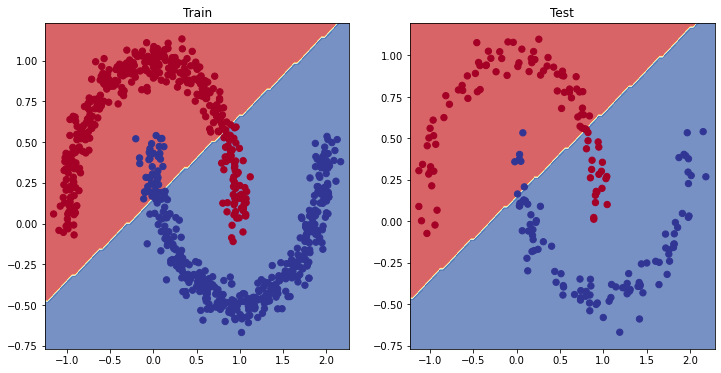

In [85]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_1, X_test, y_test)

The model is clearly undefitting, we need to add non-linearity to the model to make it better

## Adding Non-Linearity

In [86]:
class Model2(nn.Module):
    def __init__(self) -> None:
        super().__init__()
        self.layer1 = nn.Linear(in_features=2, out_features= 10)
        self.layer2 = nn.Linear(in_features=10, out_features=10)
        self.layer3 = nn.Linear(in_features=10, out_features= 1)
        self.relu = nn.ReLU()

    
    def forward(self, x):
        return  self.layer3(self.relu(self.layer2(self.relu(self.layer1(x)))))
    

model_2 = Model2().to(device)

In [87]:
loss_function = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model_2.parameters(), lr= 0.1)

In [88]:
torch.manual_seed(42)
epochs = 2000

X_train, X_test = X_train.to(device), X_test.to(device)
y_train, y_test = y_train.to(device), y_test.to(device)


for epoch in range(epochs):

    model_2.train()
    y_logits = model_2(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits))
    loss = loss_function(y_logits, y_train)
    acc_train = accuracy_fn(y_train, y_pred)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    model_2.eval()
    with torch.inference_mode():
        test_logits = model_2(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))
        test_loss = loss_function(test_logits, y_test)
        test_acc = accuracy_fn(y_test, test_pred)

    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc_train:.2f}% | Test Loss: {test_loss:.5f}, Test Accuracy: {test_acc}")

Epoch: 0 | Loss: 0.69532, Accuracy: 37.38% | Test Loss: 0.69446, Test Accuracy: 49.5
Epoch: 100 | Loss: 0.38865, Accuracy: 81.62% | Test Loss: 0.40304, Test Accuracy: 76.0
Epoch: 200 | Loss: 0.24289, Accuracy: 88.50% | Test Loss: 0.24102, Test Accuracy: 89.5
Epoch: 300 | Loss: 0.20105, Accuracy: 90.88% | Test Loss: 0.19153, Test Accuracy: 93.5
Epoch: 400 | Loss: 0.16584, Accuracy: 92.88% | Test Loss: 0.15421, Test Accuracy: 94.0
Epoch: 500 | Loss: 0.12358, Accuracy: 95.12% | Test Loss: 0.11175, Test Accuracy: 96.0
Epoch: 600 | Loss: 0.08452, Accuracy: 97.88% | Test Loss: 0.07401, Test Accuracy: 98.5
Epoch: 700 | Loss: 0.05662, Accuracy: 99.00% | Test Loss: 0.04811, Test Accuracy: 99.5
Epoch: 800 | Loss: 0.04003, Accuracy: 99.25% | Test Loss: 0.03284, Test Accuracy: 99.5
Epoch: 900 | Loss: 0.02999, Accuracy: 99.75% | Test Loss: 0.02394, Test Accuracy: 100.0
Epoch: 1000 | Loss: 0.02358, Accuracy: 99.88% | Test Loss: 0.01845, Test Accuracy: 100.0
Epoch: 1100 | Loss: 0.01925, Accuracy: 99.

In [89]:
model_2.eval()
with torch.inference_mode():
    y_preds = torch.round(torch.sigmoid(model_2(X_test))).squeeze()
y_preds[:10], y[:10] 

(tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]),
 tensor([1., 1., 1., 1., 0., 1., 1., 1., 1., 0.]))

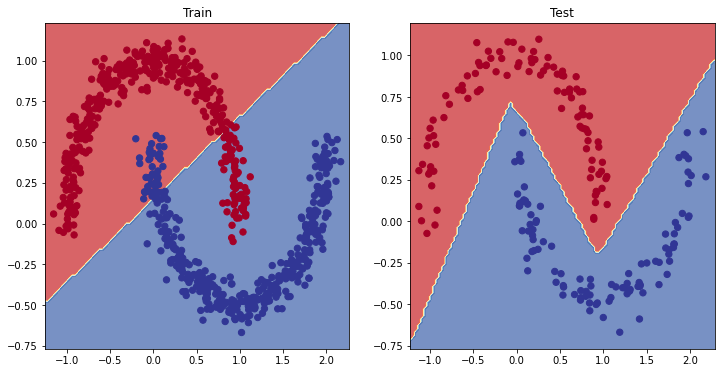

In [90]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train) # model_1 = no non-linearity
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_2, X_test, y_test) # with non linearity

## Multi-class Classification

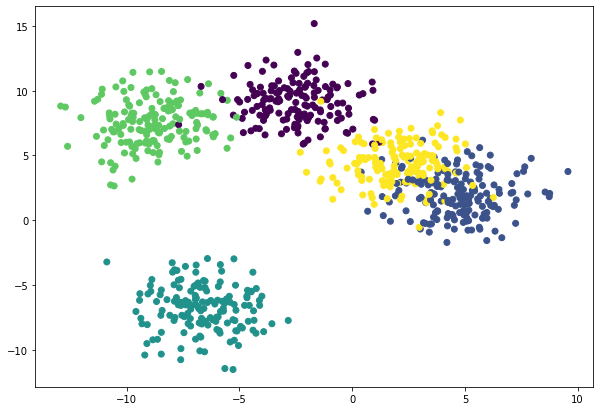

In [97]:
from sklearn.datasets import make_blobs


X, y = make_blobs(n_samples= 1000, n_features= 2, centers= 5, cluster_std= 1.6, random_state= 42)
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.LongTensor)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,  random_state=42) 

plt.figure(figsize=(10, 7))
plt.scatter(x= X_train[:, 0], y= X_train[:, 1], c= y_train);

In [99]:
class Model3(nn.Module):

    def __init__(self, in_features, hidden_units, out_features) -> None:
        super().__init__()
        self.layers = nn.Sequential(
            nn.Linear(in_features= in_features, out_features= hidden_units),
            nn.ReLU(),
            nn.Linear(in_features = hidden_units, out_features = hidden_units),
            nn.ReLU(),
            nn.Linear(in_features= hidden_units, out_features= out_features)
        )

    def forward(self, x):
        return self.layers(x)
    

model3 = Model3(in_features= 2, hidden_units= 10, out_features= 5).to(device)
model3

Model3(
  (layers): Sequential(
    (0): Linear(in_features=2, out_features=10, bias=True)
    (1): ReLU()
    (2): Linear(in_features=10, out_features=10, bias=True)
    (3): ReLU()
    (4): Linear(in_features=10, out_features=5, bias=True)
  )
)

In [100]:
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(lr= 0.01, params= model3.parameters())

In [104]:
epochs = 1000

X_train, X_test = X_train.to(device), X_test.to(device)
y_train, y_test = y_train.to(device), y_test.to(device)

for i in range(epochs):

    model3.train()
    y_logits = model3(X_train)
    y_pred_train = torch.softmax(y_logits, dim= 1).argmax(dim= 1)
    loss = loss_function(y_logits, y_train)
    acc = accuracy_fn(y_train, y_pred_train)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    model3.eval()
    with torch.inference_mode():
        test_logits = model3(X_test)
        y_pred_test = torch.softmax(test_logits, dim=1).argmax(dim=1)
        test_loss = loss_function(test_logits, y_test)
        test_acc = accuracy_fn(y_test, y_pred_test)

    if i % 100 == 0:
        print(f"Epoch: {i} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Acc: {test_acc:.2f}%") 

Epoch: 0 | Loss: 1.02444, Acc: 60.00% | Test Loss: 1.02180, Test Acc: 58.50%
Epoch: 100 | Loss: 0.77294, Acc: 66.00% | Test Loss: 0.78670, Test Acc: 64.50%
Epoch: 200 | Loss: 0.63038, Acc: 70.62% | Test Loss: 0.64147, Test Acc: 68.00%
Epoch: 300 | Loss: 0.46884, Acc: 87.00% | Test Loss: 0.46972, Test Acc: 86.00%
Epoch: 400 | Loss: 0.35811, Acc: 90.62% | Test Loss: 0.35486, Test Acc: 89.50%
Epoch: 500 | Loss: 0.29860, Acc: 90.88% | Test Loss: 0.29533, Test Acc: 90.50%
Epoch: 600 | Loss: 0.26938, Acc: 90.75% | Test Loss: 0.26684, Test Acc: 90.50%
Epoch: 700 | Loss: 0.25403, Acc: 91.25% | Test Loss: 0.25234, Test Acc: 90.50%
Epoch: 800 | Loss: 0.24509, Acc: 91.38% | Test Loss: 0.24463, Test Acc: 90.00%
Epoch: 900 | Loss: 0.23925, Acc: 91.50% | Test Loss: 0.23997, Test Acc: 90.00%


In [105]:
model3.eval()
with torch.inference_mode():
    y_pred = model3(X_test)
    y_pred = torch.softmax(y_pred, dim= 1).argmax(dim= 1)

y_test[:5], y_pred[:5]

(tensor([0, 1, 1, 2, 0]), tensor([0, 1, 4, 2, 0]))

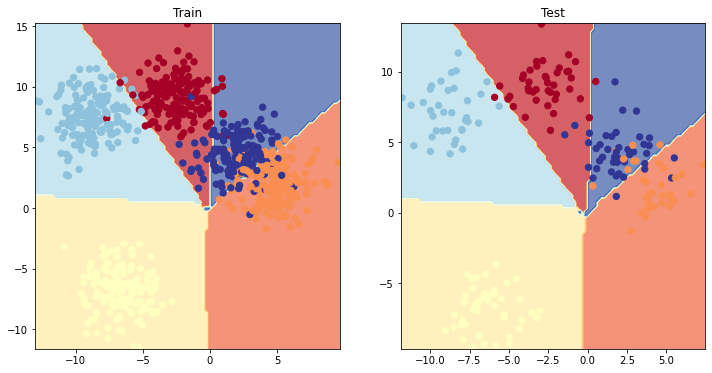

In [106]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model3, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model3, X_test, y_test)